In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import sys
import os

sys.path.append(os.path.abspath("../scripts"))
export_path = "../data/sierraleone-bumbuna_clean.csv"

path = "../data/sierraleone-bumbuna.csv"


In [5]:
df = pd.read_csv(path)

In [6]:
from detect_outliers import detect_outliers
from imputate_outliers import remove_outliers
from clean_data import clean_data


In [7]:
#brief summary
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [8]:
print("columns", df.columns.tolist())


columns ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [9]:
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [10]:
df.dtypes


Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [11]:

total = len(df)
print(total)

525600


In [12]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

In [13]:

#number of missing 
missing = df.isna().sum()
print(missing[missing > 0])

percentage = (missing / len(df))* 100
missing_report = pd.DataFrame({ "Missing" : missing, "Percentage": percentage })
print(missing_report)

Comments    525600
dtype: int64
               Missing  Percentage
Timestamp            0         0.0
GHI                  0         0.0
DNI                  0         0.0
DHI                  0         0.0
ModA                 0         0.0
ModB                 0         0.0
Tamb                 0         0.0
RH                   0         0.0
WS                   0         0.0
WSgust               0         0.0
WSstdev              0         0.0
WD                   0         0.0
WDstdev              0         0.0
BP                   0         0.0
Cleaning             0         0.0
Precipitation        0         0.0
TModA                0         0.0
TModB                0         0.0
Comments        525600       100.0
Hour                 0         0.0
Day                  0         0.0
Month                0         0.0
Year                 0         0.0
DayOfWeek            0         0.0


In [14]:
print(missing_report[missing_report["Percentage"] > 5])


          Missing  Percentage
Comments   525600       100.0


In [15]:
duplicate_count = df.duplicated().sum()
print('Duplicate count', duplicate_count)

Duplicate count 0


In [16]:
print((df[['GHI', 'DNI', 'DHI']] < 0).sum())


GHI    261135
DNI    266352
DHI    263128
dtype: int64


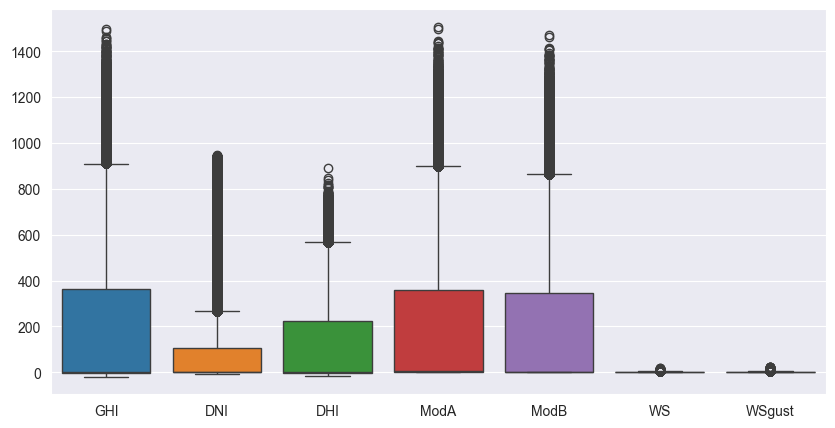

In [17]:

columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[columns])
plt.show()

In [18]:
outlier_flags = detect_outliers(df, columns)


Number of outlier samples flagged: 16292


In [19]:

# Removal script in scripts/remove_outliers
columns = ['ModA', 'ModB','WS', 'WSgust', 'DNI', 'DHI', 'GHI']
df_no_outliers = remove_outliers(df.copy(), columns, outlier_flags)

In [20]:
#Cleaning Scrpt can be found in Scripts/clean_data
df_clean = clean_data(df_no_outliers)

In [21]:
df_clean.to_csv(export_path, index=False)


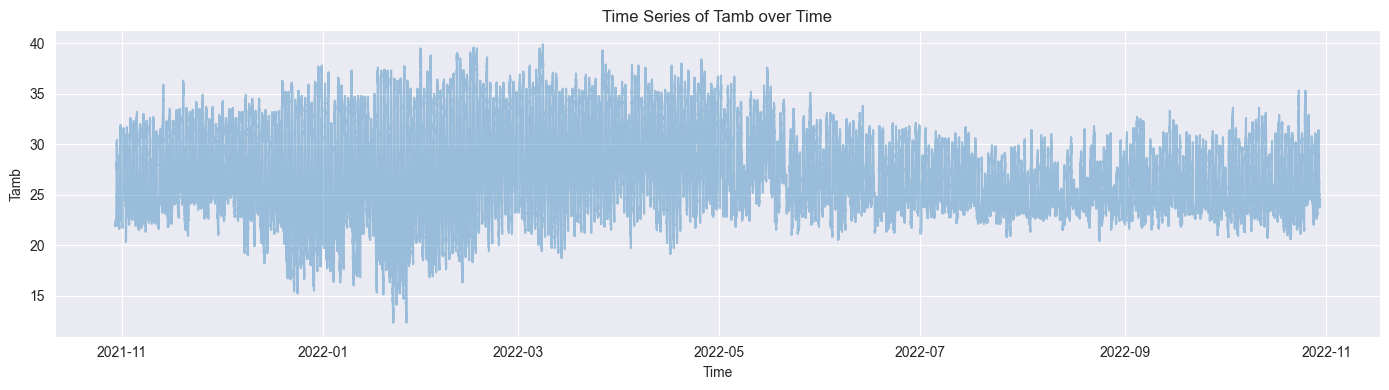

In [22]:

plt.figure(figsize=(14, 4))
plt.plot(df['Timestamp'], df['Tamb'], alpha=0.4)
plt.title(f'Time Series of Tamb over Time')
plt.xlabel('Time')
plt.ylabel('Tamb')
plt.grid(True)
plt.tight_layout()
plt.show()

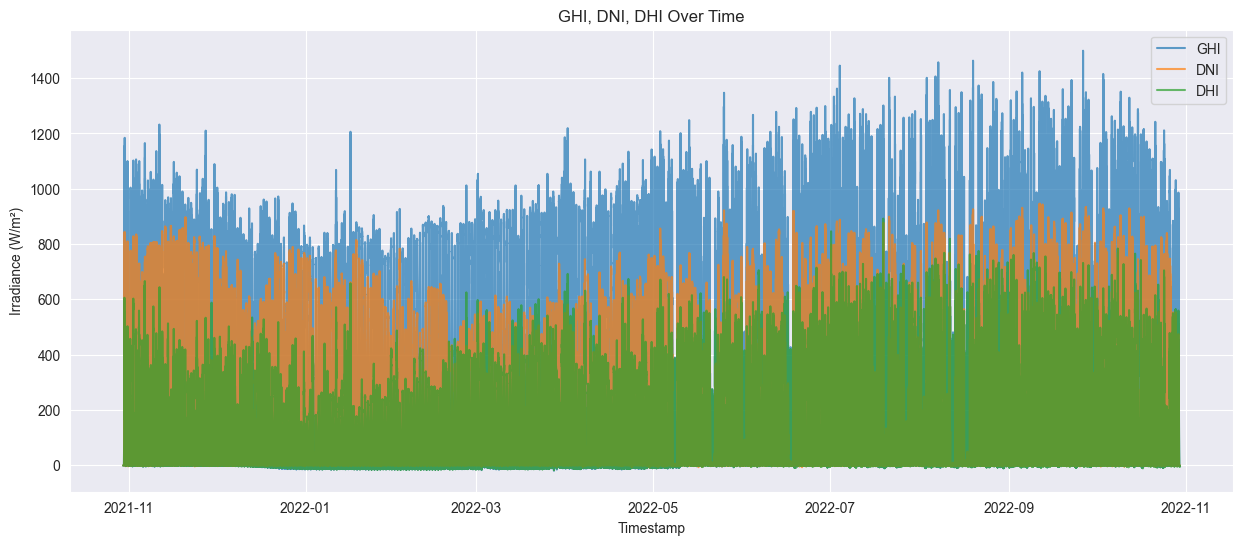

In [23]:

plt.figure(figsize=(15, 6))

plt.plot(df['Timestamp'], df['GHI'], label='GHI', alpha=0.7)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', alpha=0.7)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', alpha=0.7)

plt.title('GHI, DNI, DHI Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid(True)
plt.show()

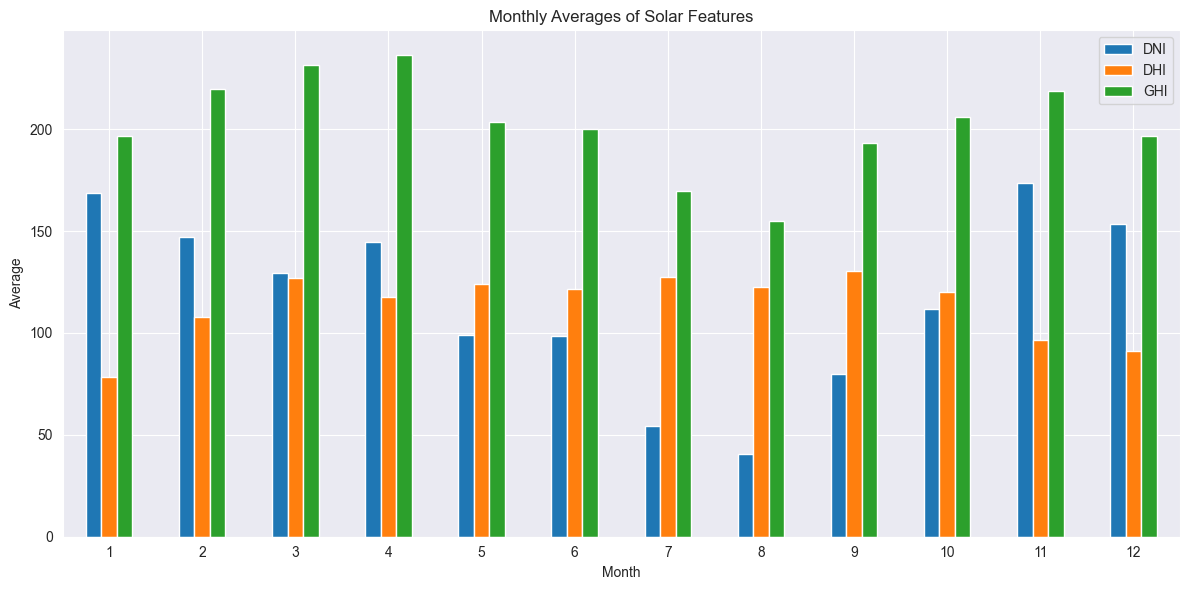

In [24]:

cols = ['DNI', 'DHI', 'GHI']
monthly_avg = df.groupby('Month')[cols].mean()

monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title('Monthly Averages of Solar Features')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

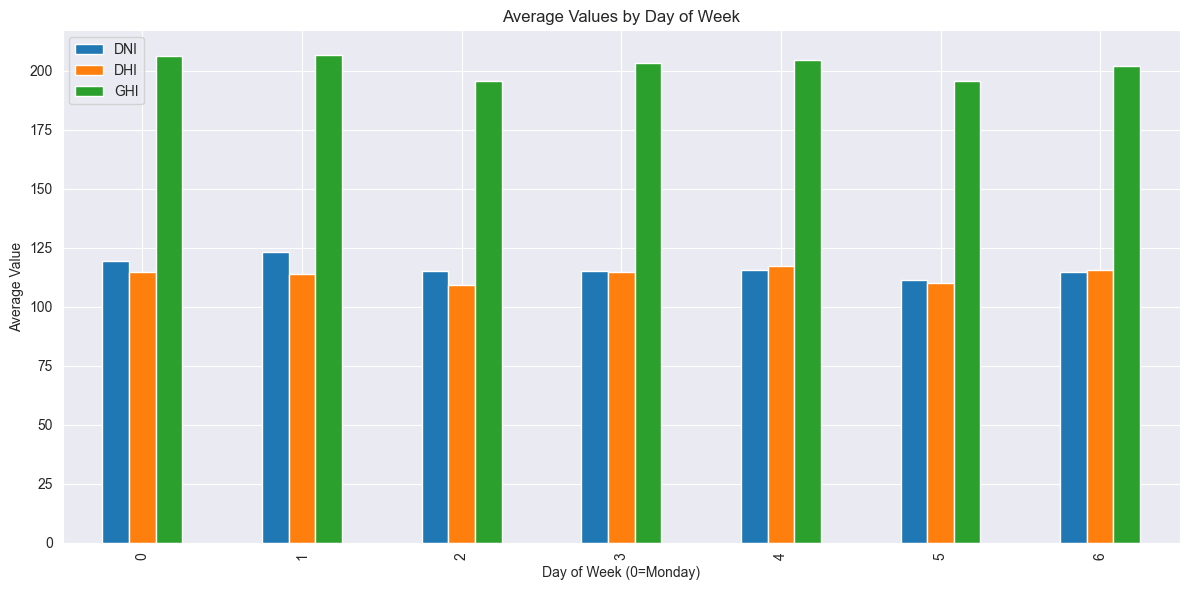

In [25]:
week_avg = df.groupby('DayOfWeek')[cols].mean()

week_avg.plot(kind='bar', figsize=(12,6))
plt.title('Average Values by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Average Value')
plt.grid(True)
plt.tight_layout()
plt.show()

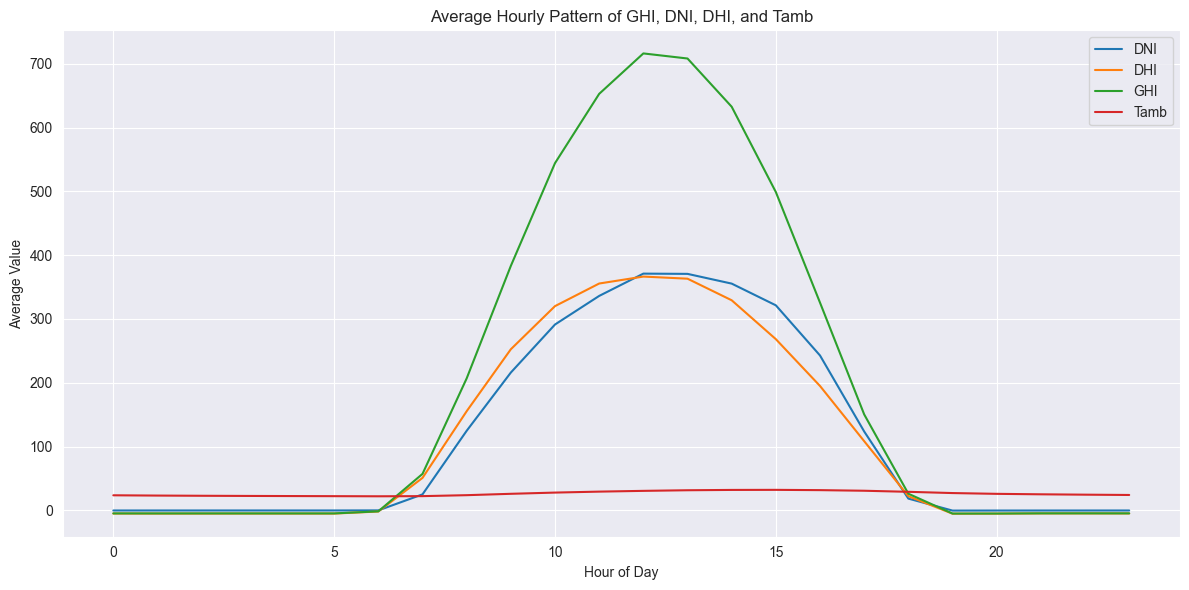

In [26]:
cols = ['DNI', 'DHI', 'GHI', 'Tamb']
hourly_avg = df.groupby('Hour')[cols].mean()

hourly_avg.plot(figsize=(12,6))
plt.title('Average Hourly Pattern of GHI, DNI, DHI, and Tamb')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.tight_layout()
plt.show()

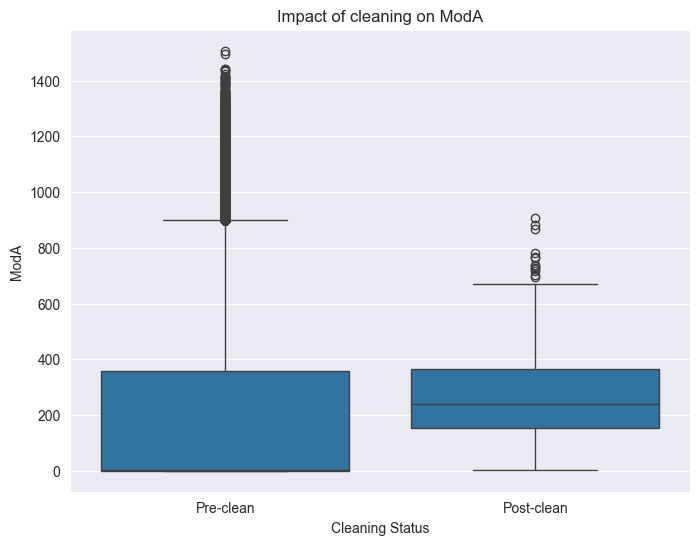

In [27]:

pre_clean = df[df['Cleaning'] == 0]['ModA']
post_clean = df[df['Cleaning'] == 1]['ModA']

combined = pd.DataFrame({
    'ModA': pd.concat([pre_clean, post_clean], ignore_index=True),
    'Cleaning Status': ['Pre-clean'] * len(pre_clean) + ['Post-clean'] * len(post_clean)
})

plt.figure(figsize=(8,6))
sns.boxplot(data=combined, x='Cleaning Status', y='ModA')
plt.title('Impact of cleaning on ModA')
plt.show()

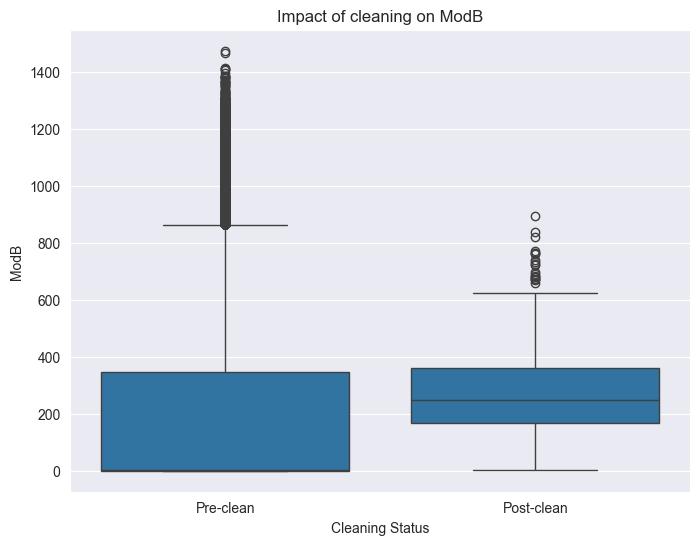

In [28]:
pre_clean = df[df['Cleaning'] == 0]['ModB']
post_clean = df[df['Cleaning'] == 1]['ModB']

combined = pd.DataFrame({
    'ModB': pd.concat([pre_clean, post_clean], ignore_index=True),
    'Cleaning Status': ['Pre-clean'] * len(pre_clean) + ['Post-clean'] * len(post_clean)
})

plt.figure(figsize=(8,6))
sns.boxplot(data=combined, x='Cleaning Status', y='ModB')
plt.title('Impact of cleaning on ModB')
plt.show()

<Axes: >

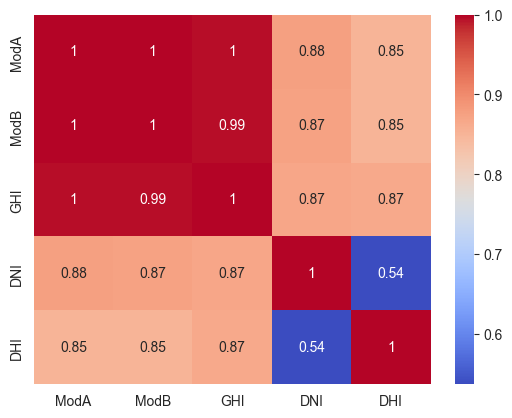

In [29]:
mod_corr = df[['ModA', 'ModB', 'GHI', 'DNI', 'DHI']].corr()
sns.heatmap(mod_corr, annot=True, cmap="coolwarm")

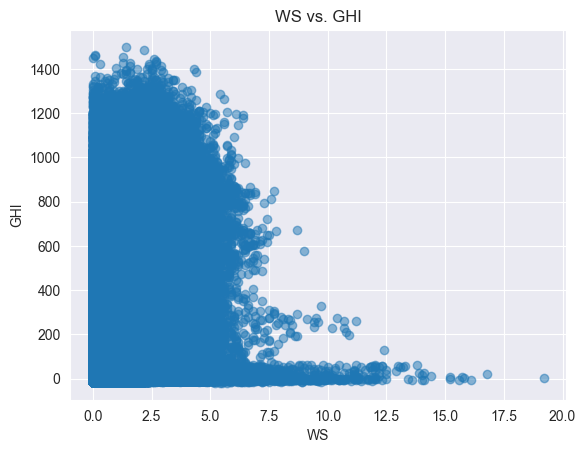

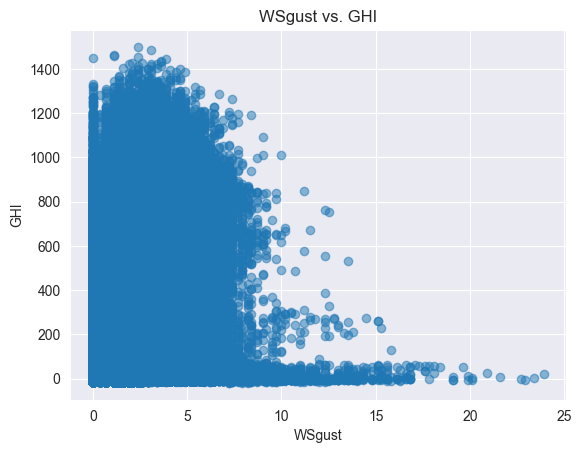

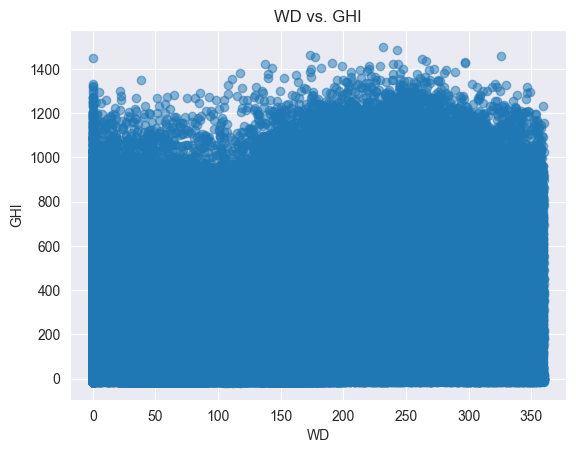

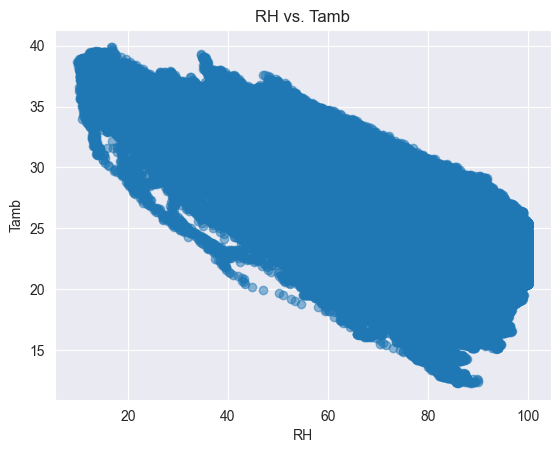

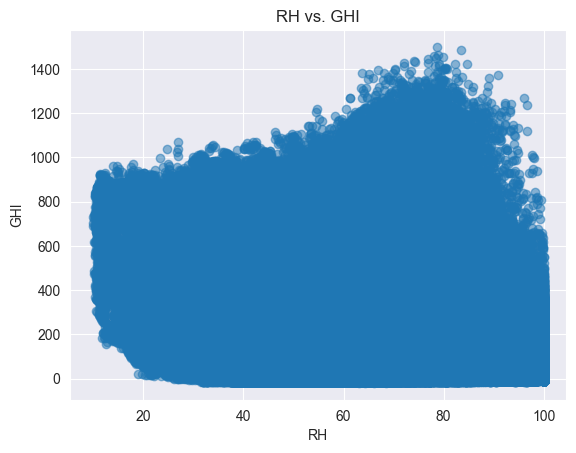

In [30]:
pairs = [
    ('WS','GHI'), ('WSgust','GHI'), ('WD','GHI'),
    ('RH','Tamb'), ('RH','GHI')
]
df_clean = df.copy()
for x,y in pairs:
    plt.figure()
    plt.scatter(df_clean[x], df_clean[y], alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs. {y}")

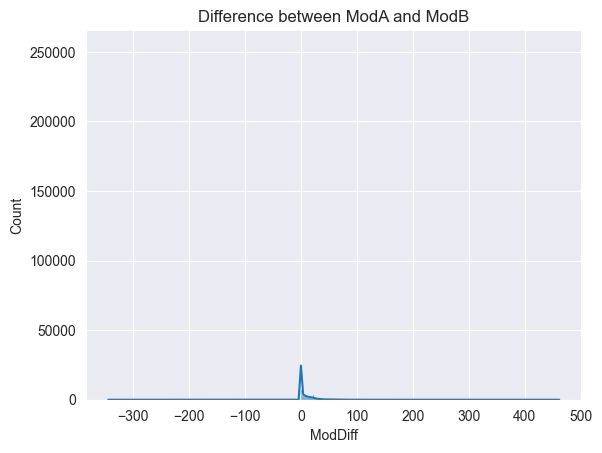

In [31]:

df['ModDiff'] = df['ModA'] - df['ModB']
sns.histplot(df['ModDiff'], kde=True)
plt.title("Difference between ModA and ModB")
plt.show()

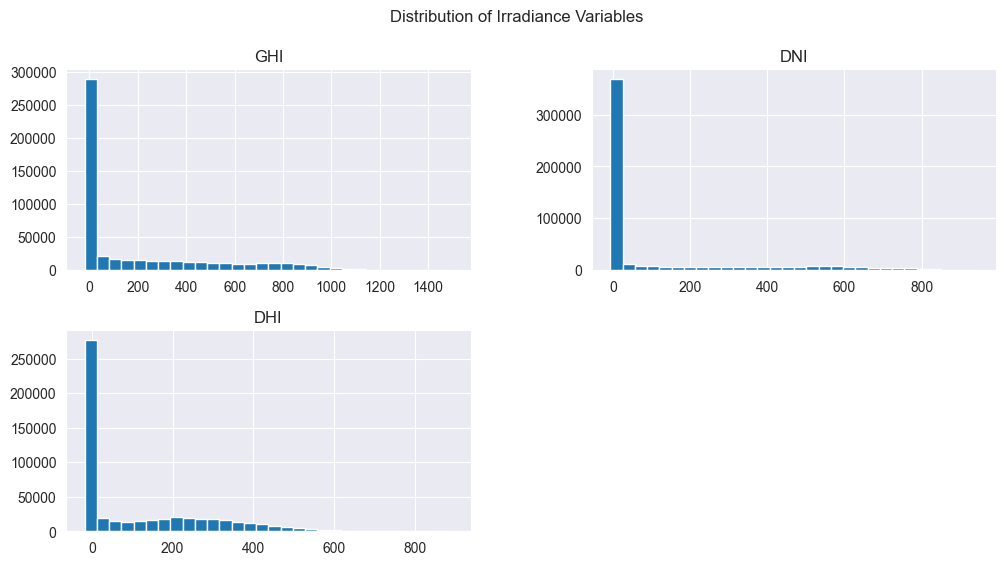

In [32]:
df[['GHI', 'DNI', 'DHI']].hist(bins=30, figsize=(12,6))
plt.suptitle("Distribution of Irradiance Variables")
plt.show()

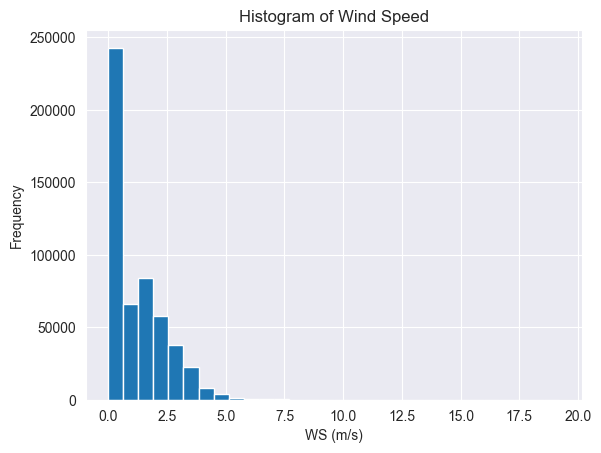

In [33]:
plt.figure()
plt.hist(df_clean['WS'].dropna(), bins=30)
plt.title('Histogram of Wind Speed')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')
plt.show()

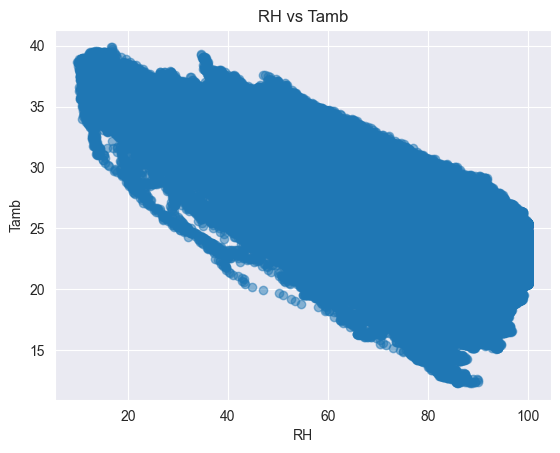

In [34]:
plt.figure()
plt.scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.5)
plt.xlabel('RH')
plt.ylabel('Tamb')
plt.title('RH vs Tamb')
plt.show()

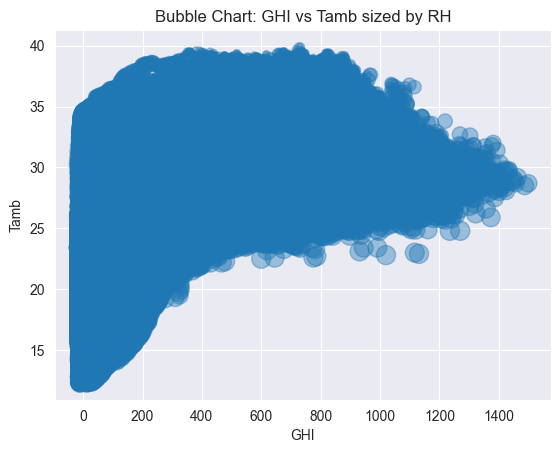

In [35]:
plt.figure()
plt.scatter(df_clean['GHI'], df_clean['Tamb'],
            s=df_clean['RH']/df_clean['RH'].max()*200, alpha=0.4)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb sized by RH')
plt.show()